In [0]:
!pip install covid

In [0]:
from covid import Covid

covid = Covid()
data=covid.get_data()

In [0]:
import csv

In [0]:
csvfile=open('covid.csv','w', newline='') 
fields=list(data[0].keys())
obj=csv.DictWriter(csvfile, fieldnames=fields)	      
obj.writeheader()	      
obj.writerows(data)	      
csvfile.close()

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [0]:
from sklearn.cluster import KMeans

In [0]:
df=pd.read_csv("covid.csv")
olddf=pd.read_csv("COVIDTYPE.csv")

In [0]:
df['confirmed'].fillna(df['active']+df['deaths']+df['recovered'],inplace=True)
df['active'].fillna(df['confirmed']-(df['deaths']+df['recovered']),inplace=True)
df['deaths'].fillna(df['confirmed']-(df['active']+df['recovered']),inplace=True)
df['recovered'].fillna(df['confirmed']-(df['active']+df['deaths']),inplace=True)
deathpercent=(df['deaths']/df['confirmed'])*100
recoverpercent=(df['recovered']/df['confirmed'])*100
df['deathpercent']=deathpercent
df['recoverpercent']=recoverpercent

In [0]:
df = pd.merge(df,olddf[['id','TYPE']],on='id')

In [0]:
df.to_csv('covid.csv', index=False)

In [0]:
df = df[pd.notnull(df['TYPE'])]

In [0]:
df.TYPE=df.TYPE.apply(['A','B','C'].index)

In [0]:
df = df.drop('last_update', axis=1)

In [0]:
df=df.drop('latitude', axis=1)
df=df.drop('longitude', axis=1)

In [0]:
df

,id,country,confirmed,active,deaths,recovered,deathpercent,recoverpercent,TYPE
0,18,US,1256972,1010344,75670,195036,6.020023,15.516336,0
1,162,Spain,221447,66866,26070,128511,11.772569,58.032396,1
2,11,Italy,215858,89624,29958,96276,13.878568,44.601544,2
3,17,United Kingdom,207977,176318,30689,970,14.755959,0.466398,1
4,14,Russia,187859,159528,1723,26608,0.917177,14.163814,1
...,...,...,...,...,...,...,...,...,...
179,53,Comoros,8,7,1,0,12.500000,0.000000,1
180,118,Mauritania,8,1,1,6,12.500000,75.000000,2
181,137,Papua New Guinea,8,0,0,8,0.000000,100.000000,0
182,36,Bhutan,7,2,0,5,0.000000,71.428571,1


In [0]:
X = df.iloc[:,2:8].values  
X.shape

(183, 6)

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
s=SelectKBest(chi2,k=2)

In [0]:
Xnew=s.fit_transform(X,df['TYPE'])


In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
clf=ExtraTreesClassifier(n_estimators=5000)

In [0]:
clf.fit(X,df['TYPE'])

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=5000,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [0]:
clf.feature_importances_

array([0.17104745, 0.16669017, 0.14676882, 0.17776028, 0.160565  ,
       0.17716828])

In [0]:
model=SelectFromModel(clf,prefit=True)
Xnew2=model.transform(X)
Xnew2.shape

(183, 4)

In [0]:
from sklearn.cluster import KMeans

In [0]:
xKmean=df.iloc[:,6:8].values

In [0]:
model=KMeans(n_clusters=3,random_state=0)
y=model.fit(xKmean)

In [0]:
y.labels_

array([2, 1, 1, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1,
       2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1,
       2, 1, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 1, 0, 0, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       1, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 0, 2, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1, 2, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0,
       0, 2, 2, 0, 0, 0, 0], dtype=int32)

In [0]:
y.predict(xKmean)

array([2, 1, 1, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1,
       2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1,
       2, 1, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 1, 0, 0, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       1, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 0, 2, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1, 2, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0,
       0, 2, 2, 0, 0, 0, 0], dtype=int32)

In [0]:
ytest.values

array([0, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1])

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm=confusion_matrix(y.predict(xtest),ytest)
cm

array([[ 5,  7,  2],
       [ 3, 12,  3],
       [ 2, 17,  4]])

In [0]:
from mlxtend.plotting import plot_decision_regions as decision_regions

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0, 0.5, 'recover')

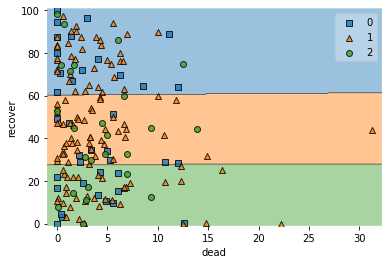

In [0]:
fig = decision_regions(xKmean, df['TYPE'].values, clf=model, legend=1)
plt.xlabel('dead')
plt.ylabel('recover')

In [0]:
result=pd.DataFrame()
result['id']=df['id']
result['real']=df['TYPE']
result['predict']=y.predict(xKmean)

result=pd.merge(result,df[['id','country']],on='id')

result.to_csv('resultKmeans.csv', index=False)

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [0]:
xAggr=df.iloc[:,6:8].values
cluster=cluster.fit(xAggr)


Text(0.5, 1.0, 'K=3')

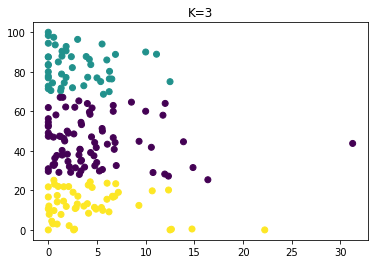

In [0]:
plt.scatter(xAggr[:, 0], xAggr[:, 1], c=cluster.labels_)
plt.title("K=3")

In [0]:
cluster.fit_predict(xAggr)

array([2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0,
       2, 0, 1, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0,
       2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0,
       0, 1, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2,
       0, 2, 2, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 2, 0, 2, 2, 2, 0,
       0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 1])

In [0]:
cm=confusion_matrix(df['TYPE'],cluster.fit_predict(xAggr))
cm

array([[14, 11, 13],
       [57, 30, 33],
       [11,  7,  7]])

In [0]:
df['TYPE'].values

array([0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 0,
       1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 1,
       2, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       2, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 2, 0, 1, 1])

In [0]:
result=pd.DataFrame()
result['id']=df['id']
result['real']=df['TYPE']
result['predict']=cluster.fit_predict(xAggr)

result=pd.merge(result,df[['id','country']],on='id')

result.to_csv('resultAgg.csv', index=False)

In [0]:
from scipy.cluster.hierarchy import dendrogram,linkage

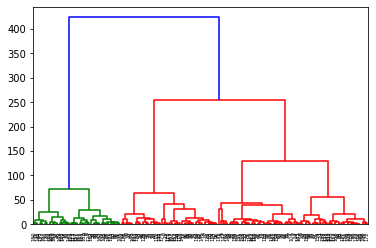

In [0]:
dendrogram(linkage(xAggr,'ward'));

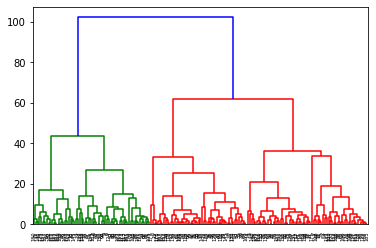

In [0]:
dendrogram(linkage(xAggr,'complete'));

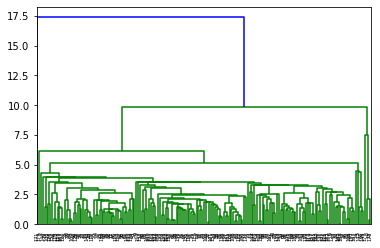

In [0]:
dendrogram(linkage(xAggr,'single'));

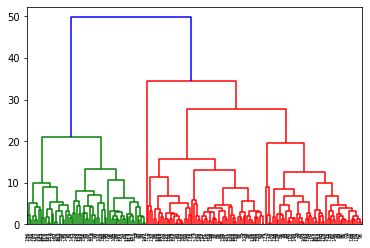

In [0]:
dendrogram(linkage(xAggr,'average'));

In [0]:
from google.colab import drive
drive.mount('/content/drive')